# Brazil COVID-19 Hospital Dataset



Background

The World Health Organization (WHO) characterized the COVID-19, caused by the SARS-CoV-2, as a pandemic on March 11, while the exponential increase in the number of cases was risking to overwhelm health systems around the world with a demand for ICU beds far above the existing capacity, with regions of Italy being prominent examples.

Brazil recorded the first case of SARS-CoV-2 on February 26, and the virus transmission evolved from imported cases only, to local and finally community transmission very rapidly, with the federal government declaring nationwide community transmission on March 20.

Until March 27, the state of São Paulo had recorded 1,223 confirmed cases of COVID-19, with 68 related deaths, while the county of São Paulo, with a population of approximately 12 million people and where Hospital Israelita Albert Einstein is located, had 477 confirmed cases and 30 associated death, as of March 23. Both the state and the county of São Paulo decided to establish quarantine and social distancing measures, that will be enforced at least until early April, in an effort to slow the virus spread.

One of the motivations for this challenge is the fact that in the context of an overwhelmed health system with the possible limitation to perform tests for the detection of SARS-CoV-2, testing every case would be impractical and tests results could be delayed even if only a target subpopulation would be tested.

Dataset

This dataset contains anonymized data from patients seen at the Hospital Israelita Albert Einstein, at São Paulo, Brazil, and who had samples collected to perform the SARS-CoV-2 RT-PCR and additional laboratory tests during a visit to the hospital.

All data were anonymized following the best international practices and recommendations. All clinical data were standardized to have a mean of zero and a unit standard deviation.

Task Details

TASK 1
• Predict confirmed COVID-19 cases among suspected cases.
Based on the results of laboratory tests commonly collected for a suspected COVID-19 case during a visit to the emergency room, would it be possible to predict the test result for SARS-Cov-2 (positive/negative)?

TASK 2
• Predict admission to general ward, semi-intensive unit or intensive care unit among confirmed COVID-19 cases.
Based on the results of laboratory tests commonly collected among confirmed COVID-19 cases during a visit to the emergency room, would it be possible to predict which patients will need to be admitted to a general ward, semi-intensive unit or intensive care unit?

In [1]:
# Importing necesssary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Dataset
df=pd.read_csv("covid19_clinical_dataset.csv")
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(5644, 111)

In [4]:
print(df.columns.values)

['Patient ID' 'Patient age quantile' 'SARS-Cov-2 exam result'
 'Patient addmited to regular ward (1=yes, 0=no)'
 'Patient addmited to semi-intensive unit (1=yes, 0=no)'
 'Patient addmited to intensive care unit (1=yes, 0=no)' 'Hematocrit'
 'Hemoglobin' 'Platelets' 'Mean platelet volume ' 'Red blood Cells'
 'Lymphocytes' 'Mean corpuscular hemoglobin concentration\xa0(MCHC)'
 'Leukocytes' 'Basophils' 'Mean corpuscular hemoglobin (MCH)'
 'Eosinophils' 'Mean corpuscular volume (MCV)' 'Monocytes'
 'Red blood cell distribution width (RDW)' 'Serum Glucose'
 'Respiratory Syncytial Virus' 'Influenza A' 'Influenza B'
 'Parainfluenza 1' 'CoronavirusNL63' 'Rhinovirus/Enterovirus'
 'Mycoplasma pneumoniae' 'Coronavirus HKU1' 'Parainfluenza 3'
 'Chlamydophila pneumoniae' 'Adenovirus' 'Parainfluenza 4'
 'Coronavirus229E' 'CoronavirusOC43' 'Inf A H1N1 2009'
 'Bordetella pertussis' 'Metapneumovirus' 'Parainfluenza 2' 'Neutrophils'
 'Urea' 'Proteina C reativa mg/dL' 'Creatinine' 'Potassium' 'Sodium'
 'In

In [5]:
# Let's describe our dataset
df.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,...,-1.851852e-10,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,...,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.025978e+00,1.025978e+00,1.019049e+00
min,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,-3.970608e+00,-1.865070e+00,...,-1.999560e+00,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00
25%,4.000000,0.000000,0.000000,0.000000,-5.188074e-01,-5.862439e-01,-6.053457e-01,-6.624832e-01,-5.679496e-01,-7.307069e-01,...,-1.122574e+00,-5.348102e-01,-3.308668e-01,-9.210583e-02,-5.117720e-01,-5.397211e-01,-8.169898e-01,-1.214975e-01,-5.527296e-01,-4.852787e-01
50%,9.000000,0.000000,0.000000,0.000000,5.340703e-02,4.031596e-02,-1.217160e-01,-1.015171e-01,1.385207e-02,-1.426696e-02,...,2.677689e-01,-2.120799e-01,-1.181667e-02,2.942021e-01,7.743482e-02,5.633191e-02,-1.599549e-01,-1.174366e-02,-1.381825e-01,1.826928e-01
75%,14.000000,0.000000,0.000000,0.000000,7.171751e-01,7.295320e-01,5.314981e-01,6.838353e-01,6.661759e-01,5.976919e-01,...,7.383496e-01,2.305214e-02,6.661649e-01,5.115003e-01,4.385609e-01,5.085100e-01,4.500090e-01,-1.174366e-02,2.763648e-01,5.937525e-01
max,19.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,3.645706e+00,3.764100e+00,...,1.337265e+00,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00


# Part 1 - Predict Result of SARS-Cov-2 exam result

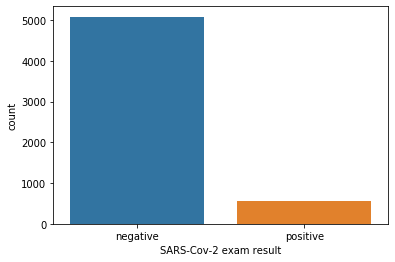

In [6]:
# Let's have a look at our target variable SARS-Cov-2 exam result
sns.countplot(df['SARS-Cov-2 exam result'])
# The no. of positives are very less as compared to negatives

float64    70
object     37
int64       4
dtype: int64

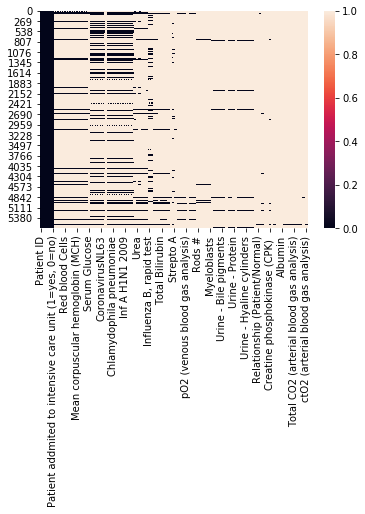

In [7]:
sns.heatmap(df.isnull())
# There are a lot of Na values in the dataset
# Datatypes of features
df.dtypes.value_counts()

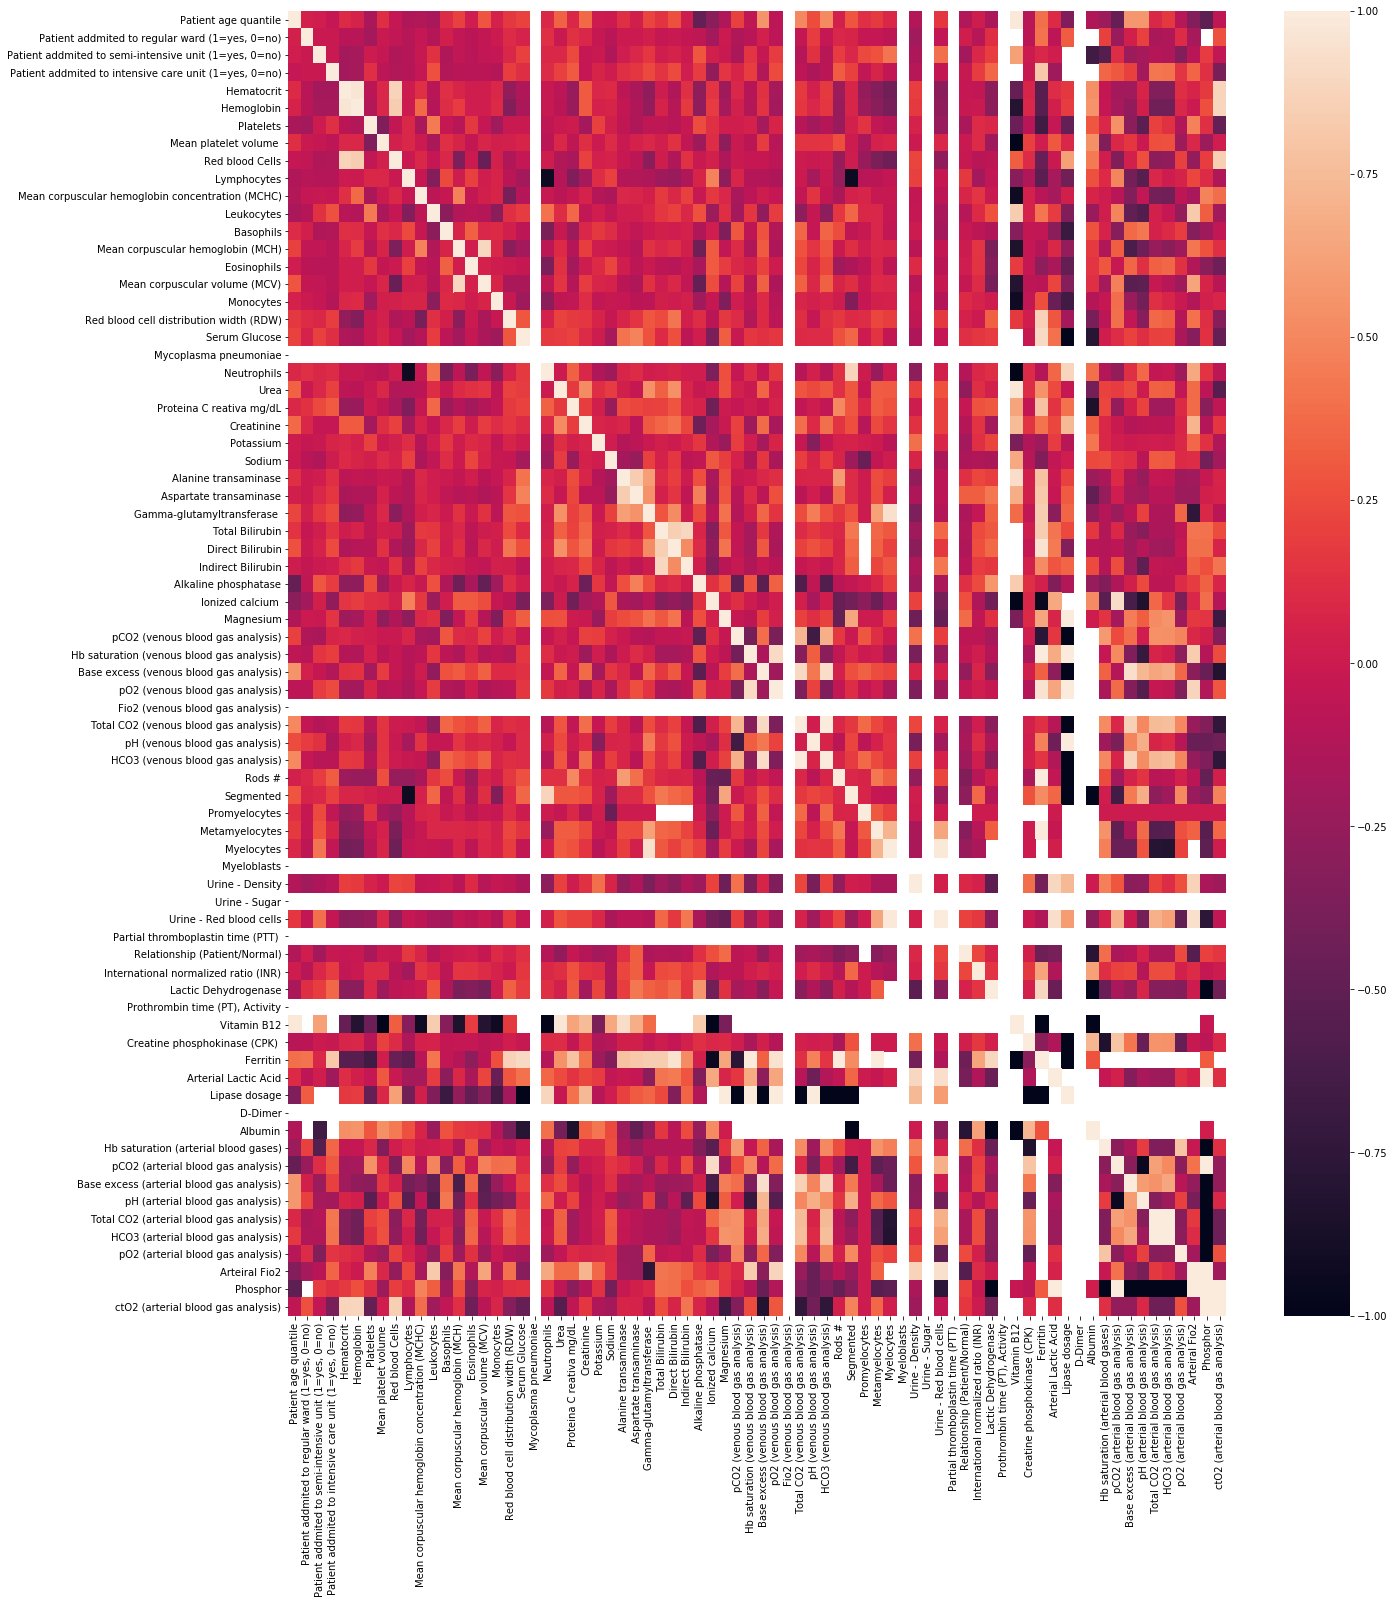

In [8]:
plt.figure(figsize=(21,24))
sns.heatmap(df.corr())

In [9]:
# Let's replace NaNs with mean for 'non object dtypes'
for col in df.columns:
    if df[col].dtype!='object':
        df[col].fillna(df[col].mean(),inplace=True)

# Let's replace NaNs with -999 for ' object dtypes'
df = df.fillna(-999)


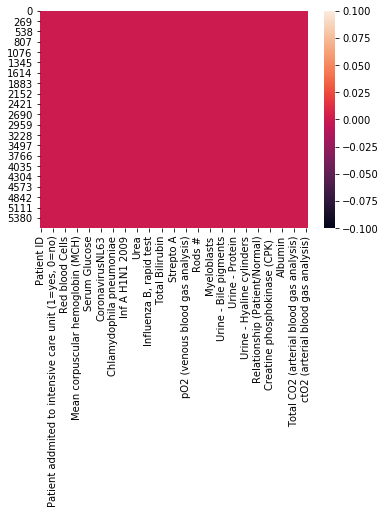

In [10]:
sns.heatmap(df.isnull())

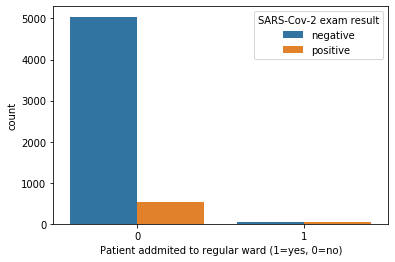

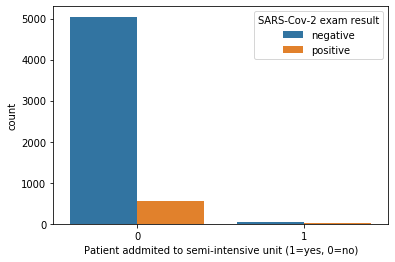

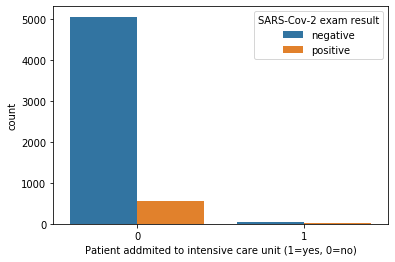

In [11]:
# Relation Between 'SARS-Cov-2 exam result' and 'Patient addmited to regular ward (1=yes, 0=no)',
# 'Patient addmited to semi-intensive unit (1=yes, 0=no)' and 'Patient addmited to intensive care unit (1=yes, 0=no)'

sns.countplot(df['Patient addmited to regular ward (1=yes, 0=no)'],hue=df['SARS-Cov-2 exam result'])
plt.show()
sns.countplot(df['Patient addmited to semi-intensive unit (1=yes, 0=no)'],hue=df['SARS-Cov-2 exam result'])
plt.show()
sns.countplot(df['Patient addmited to intensive care unit (1=yes, 0=no)'],hue=df['SARS-Cov-2 exam result'])
plt.show()

In [12]:
# Label Encoding Object dtypes:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        le.fit(list(df[col].values))
        df[col] = le.transform(list(df[col].values))

In [13]:
df.dtypes.value_counts()

float64    70
int64      41
dtype: int64

In [14]:
# We'll remove features with very high correlations (Corr>.9)
correlated_features = set()
correlation_matrix = df.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
df.drop(labels=correlated_features, axis=1, inplace=True)

In [15]:
df.shape

(5644, 80)

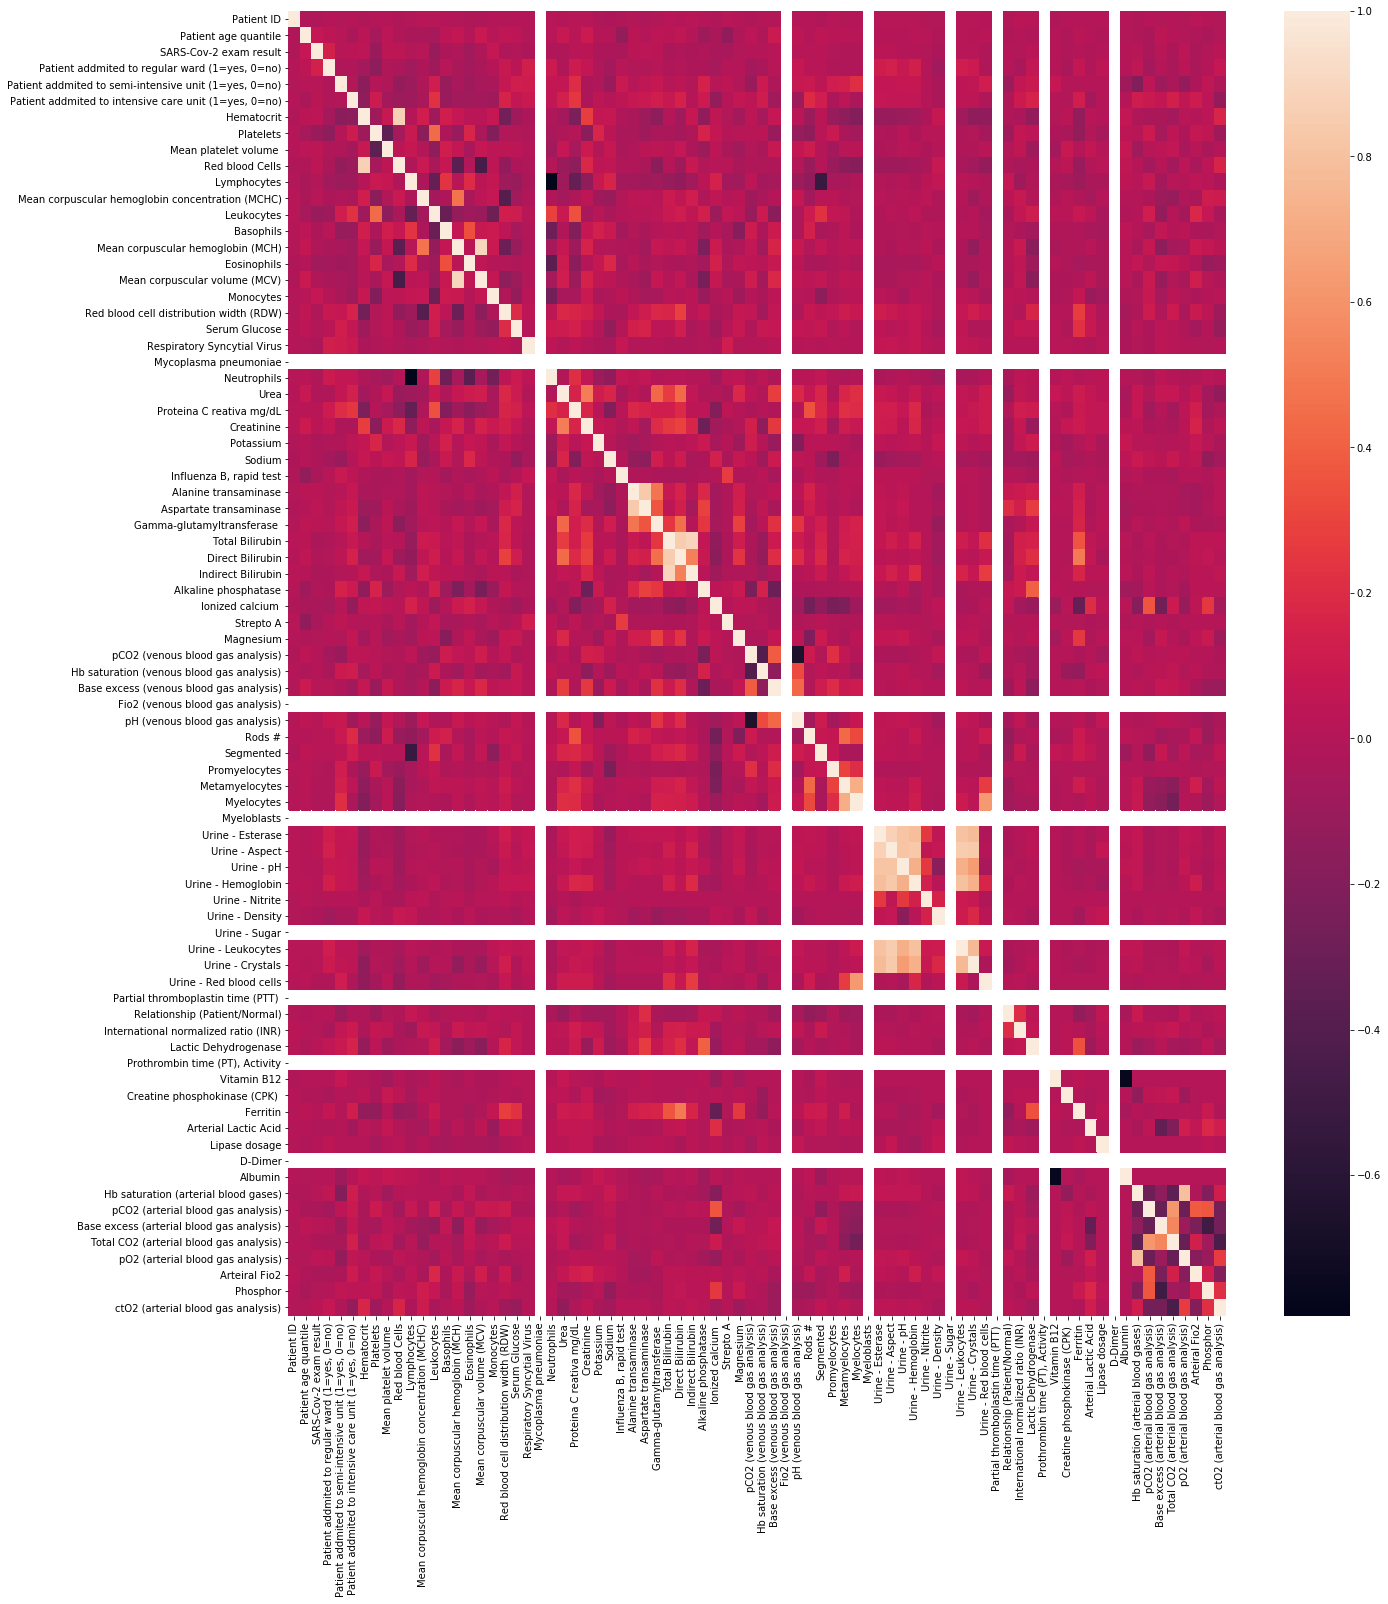

In [16]:
plt.figure(figsize=(21,24))
sns.heatmap(df.corr())

In [17]:
# Let's Separate our dataset into Features and target
df_x=df.drop(columns=["SARS-Cov-2 exam result"])
y=df[["SARS-Cov-2 exam result"]]

In [18]:
df_x.drop('Patient ID',axis=1,inplace=True)

In [19]:
# Let's do Standard Scaling on the Continous variables (x)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),...,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,0.637244,-0.119146,-0.094542,-0.085542,4.764165e-18,-1.107006e-17,2.465901e-17,-3.918602e-17,4.253734e-17,-2.421858e-17,...,0.0,4.729248e-18,-4.213359e-20,-1.042818e-18,1.550393e-18,-6.318751e-18,3.581144e-19,-2.247052e-18,-4.378380e-19,-4.497790e-18
1,1.329598,-0.119146,-0.094542,-0.085542,7.235930e-01,-1.584282e+00,3.277265e-02,3.123296e-01,9.748137e-01,-2.911253e+00,...,0.0,4.729248e-18,-4.213359e-20,-1.042818e-18,1.550393e-18,-6.318751e-18,3.581144e-19,-2.247052e-18,-4.378380e-19,-4.497790e-18
2,-0.228198,-0.119146,-0.094542,-0.085542,4.764165e-18,-1.107006e-17,2.465901e-17,-3.918602e-17,4.253734e-17,-2.421858e-17,...,0.0,4.729248e-18,-4.213359e-20,-1.042818e-18,1.550393e-18,-6.318751e-18,3.581144e-19,-2.247052e-18,-4.378380e-19,-4.497790e-18
3,-0.747464,-0.119146,-0.094542,-0.085542,4.764165e-18,-1.107006e-17,2.465901e-17,-3.918602e-17,4.253734e-17,-2.421858e-17,...,0.0,4.729248e-18,-4.213359e-20,-1.042818e-18,1.550393e-18,-6.318751e-18,3.581144e-19,-2.247052e-18,-4.378380e-19,-4.497790e-18
4,0.983421,-0.119146,-0.094542,-0.085542,4.764165e-18,-1.107006e-17,2.465901e-17,-3.918602e-17,4.253734e-17,-2.421858e-17,...,0.0,4.729248e-18,-4.213359e-20,-1.042818e-18,1.550393e-18,-6.318751e-18,3.581144e-19,-2.247052e-18,-4.378380e-19,-4.497790e-18


In [46]:
# For Multi-Class Classification let's focus on 'accuracy' score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score,accuracy_score
from sklearn.model_selection import train_test_split
def acc(clf,df_x,y):
    max_acc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        acc_scr=accuracy_score(y_test,y_pred)
        if acc_scr>max_acc_score:
            max_acc_score=acc_scr
            final_r_state=r_state
    print("max acc score corresponding to ",final_r_state," is ",max_acc_score)
    return final_r_state

In [21]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring='accuracy')
    print("Mean acc score for classifier: ",c_scores.mean())
    print("standard deviation in acc score for classifier: ",c_scores.std())
    print(c_scores)

In [22]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x)

array([[-2.41205455e-01,  1.45185760e-01, -1.32052956e-01, ...,
         3.32916102e-17,  3.07927286e-16,  1.17828566e-16],
       [ 3.19309798e-01,  3.56037841e-01, -4.49301289e+00, ...,
        -6.35584455e-18,  1.11665749e-17, -1.77194618e-17],
       [-2.58539298e-01,  1.19895217e-01, -6.08797972e-02, ...,
        -2.08802626e-17, -4.45691102e-17,  4.93140324e-17],
       ...,
       [-2.72406372e-01,  9.96627822e-02, -3.94127017e-03, ...,
         4.41511754e-19, -1.25034433e-18, -2.44233285e-18],
       [ 9.08537504e+00, -5.87309440e+00,  4.21519425e-01, ...,
        -4.29445485e-18, -1.17144037e-17,  1.64413491e-17],
       [-2.07023190e+00, -2.61600914e+00,  1.75090608e+00, ...,
         2.00362081e-17,  5.12517398e-17, -4.52819613e-17]])

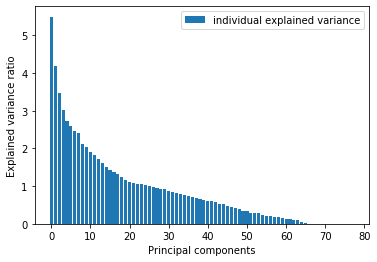

In [23]:
covariance=pca.get_covariance()
explained_variance=pca.explained_variance_
plt.bar(range(78),explained_variance, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend()

In [24]:
pca_modified=PCA(n_components=0.95)
x=pca_modified.fit_transform(x)

In [25]:
x.shape

(5644, 49)

In [26]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
r_state=acc(lg,x,y)

max acc score corresponding to  57  is  0.608503100088574


In [27]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
parameters = {"n_estimators":[10,50,100,150,200,250,500]}
clf = GridSearchCV(rfc, parameters, cv=5,scoring="accuracy")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 250}

In [28]:
rfc=RandomForestClassifier(n_estimators=250)
r_state=acc(rfc,x,y)

max acc score corresponding to  92  is  0.6395039858281665


In [29]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
parameters = {"criterion":["gini", "entropy"]}
clf = GridSearchCV(dc, parameters, cv=5,scoring="accuracy")
clf.fit(x, y)
clf.best_params_

{'criterion': 'entropy'}

In [30]:
dc=DecisionTreeClassifier(criterion="entropy")
r_state=acc(dc,x,y)

max acc score corresponding to  69  is  0.6244464127546502


In [32]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
r_state=acc(gnb,x,y)

max acc score corresponding to  84  is  0.8724534986713907


In [35]:
# Cross Validation

print("\n\nRandom Forest Classifier\n\n")
model_evaluation(rfc,x,y)

print("\n\nDecisionTree Classifier\n\n")
model_evaluation(dc,x,y)

print("\n\nLogistic Regression Classifier\n\n")
model_evaluation(lg,x,y)

print("\n\nGaussian NB Classifier\n\n")
model_evaluation(gnb,x,y)




Random Forest Classifier


Mean acc score for classifier:  0.9021967598263698
standard deviation in acc score for classifier:  0.0018378026124257988
[0.90434012 0.90168291 0.89991143 0.90434012 0.90070922]


DecisionTree Classifier


Mean acc score for classifier:  0.8926263749379668
standard deviation in acc score for classifier:  0.010110468096452718
[0.88662533 0.89636847 0.90256864 0.90168291 0.87588652]


Logistic Regression Classifier


Mean acc score for classifier:  0.8988274943620477
standard deviation in acc score for classifier:  0.010356076596264235
[0.89459699 0.90079717 0.90699734 0.9105403  0.88120567]


Gaussian NB Classifier


Mean acc score for classifier:  0.8373381640691253
standard deviation in acc score for classifier:  0.04844521555789082
[0.79007972 0.84410983 0.88485385 0.89371125 0.77393617]


In [36]:
# Selecting Random Forest Classifier

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 43,test_size=0.20)
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

In [60]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score

In [61]:
print("Confusion matrix \n",multilabel_confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Confusion matrix 
 [[[   3  108]
  [   4 1014]]

 [[1014    4]
  [ 108    3]]]
classification report 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1018
           1       0.43      0.03      0.05       111

    accuracy                           0.90      1129
   macro avg       0.67      0.51      0.50      1129
weighted avg       0.86      0.90      0.86      1129

Accuracy Score: 0.9007971656333038


In [63]:
import joblib
joblib.dump(rfc,'Brazil_results_1.pkl')

['Brazil_results_1.pkl']

# Part 2 - Predict admission to general ward, semi-intensive unit or intensive care unit among confirmed COVID-19 cases

In [64]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Platelets,Mean platelet volume,Red blood Cells,...,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,1588,13,0,0,0,0,-2.187396e-09,-3.820598e-10,7.373957e-09,8.416943e-09,...,-999.0,-5.769231e-09,-1.851852e-10,8.370370e-09,-1.703704e-09,-7.444444e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
1,451,17,0,0,0,0,2.365154e-01,-5.174130e-01,1.067657e-02,1.020042e-01,...,-999.0,-5.769231e-09,-1.851852e-10,8.370370e-09,-1.703704e-09,-7.444444e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
2,3669,8,0,0,0,0,-2.187396e-09,-3.820598e-10,7.373957e-09,8.416943e-09,...,-999.0,-5.769231e-09,-1.851852e-10,8.370370e-09,-1.703704e-09,-7.444444e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
3,5457,5,0,0,0,0,-2.187396e-09,-3.820598e-10,7.373957e-09,8.416943e-09,...,-999.0,-5.769231e-09,-1.851852e-10,8.370370e-09,-1.703704e-09,-7.444444e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
4,4843,15,0,0,0,0,-2.187396e-09,-3.820598e-10,7.373957e-09,8.416943e-09,...,-999.0,-5.769231e-09,-1.851852e-10,8.370370e-09,-1.703704e-09,-7.444444e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09


In [66]:
# Let's remove:
# Patient addmited to regular ward (1=yes, 0=no)
# Patient addmited to semi-intensive unit (1=yes, 0=no)
# Patient addmited to intensive care unit (1=yes, 0=no)
# And create a new feature Admitted with 0:No Admission,             1: Patient addmited to regular ward (1=yes, 0=no),
#   2: Patient addmited to semi-intensive unit (1=yes, 0=no)   &     3: Patient addmited to intensive care unit (1=yes, 0=no)

def Admission(a):
    counter = 0
    if (a['Patient addmited to regular ward (1=yes, 0=no)'] == 1):
        counter = counter + 1
    elif (a['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1):
        counter = counter + 2
    elif (a['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1):
        counter = counter + 3   
    else:
        counter = 0
    a['Admission'] = counter
    return a

df = df.apply(Admission, axis=1)
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Platelets,Mean platelet volume,Red blood Cells,...,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis),Admission
0,1588.0,13.0,0.0,0.0,0.0,0.0,-2.187396e-09,-3.820598e-10,7.373957e-09,8.416943e-09,...,-5.769231e-09,-1.851852e-10,8.370370e-09,-1.703704e-09,-7.444444e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.0
1,451.0,17.0,0.0,0.0,0.0,0.0,2.365154e-01,-5.174130e-01,1.067657e-02,1.020042e-01,...,-5.769231e-09,-1.851852e-10,8.370370e-09,-1.703704e-09,-7.444444e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.0
2,3669.0,8.0,0.0,0.0,0.0,0.0,-2.187396e-09,-3.820598e-10,7.373957e-09,8.416943e-09,...,-5.769231e-09,-1.851852e-10,8.370370e-09,-1.703704e-09,-7.444444e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.0
3,5457.0,5.0,0.0,0.0,0.0,0.0,-2.187396e-09,-3.820598e-10,7.373957e-09,8.416943e-09,...,-5.769231e-09,-1.851852e-10,8.370370e-09,-1.703704e-09,-7.444444e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.0
4,4843.0,15.0,0.0,0.0,0.0,0.0,-2.187396e-09,-3.820598e-10,7.373957e-09,8.416943e-09,...,-5.769231e-09,-1.851852e-10,8.370370e-09,-1.703704e-09,-7.444444e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.0


In [67]:
# Dropping the 3 rows:
df.drop(['Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)',
    'Patient addmited to intensive care unit (1=yes, 0=no)'], axis=1, inplace=True)
df.head(10)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis),Admission
0,1588.0,13.0,0.0,-2.187396e-09,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,9.784053e-10,6.218887e-09,...,-5.769231e-09,-1.851852e-10,8.370370e-09,-1.703704e-09,-7.444444e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.0
1,451.0,17.0,0.0,2.365154e-01,-5.174130e-01,1.067657e-02,1.020042e-01,3.183658e-01,-9.507903e-01,-9.461035e-02,...,-5.769231e-09,-1.851852e-10,8.370370e-09,-1.703704e-09,-7.444444e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.0
2,3669.0,8.0,0.0,-2.187396e-09,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,9.784053e-10,6.218887e-09,...,-5.769231e-09,-1.851852e-10,8.370370e-09,-1.703704e-09,-7.444444e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.0
3,5457.0,5.0,0.0,-2.187396e-09,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,9.784053e-10,6.218887e-09,...,-5.769231e-09,-1.851852e-10,8.370370e-09,-1.703704e-09,-7.444444e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.0
4,4843.0,15.0,0.0,-2.187396e-09,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,9.784053e-10,6.218887e-09,...,-5.769231e-09,-1.851852e-10,8.370370e-09,-1.703704e-09,-7.444444e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.0
5,2665.0,9.0,0.0,-2.187396e-09,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,9.784053e-10,6.218887e-09,...,-5.769231e-09,-1.851852e-10,8.370370e-09,-1.703704e-09,-7.444444e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.0
6,1008.0,13.0,0.0,-2.187396e-09,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,9.784053e-10,6.218887e-09,...,-5.769231e-09,-1.851852e-10,8.370370e-09,-1.703704e-09,-7.444444e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.0
7,1832.0,16.0,0.0,-2.187396e-09,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,9.784053e-10,6.218887e-09,...,-5.769231e-09,-1.851852e-10,8.370370e-09,-1.703704e-09,-7.444444e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.0
8,3121.0,1.0,0.0,-1.571682e+00,1.429667e+00,-1.672222e+00,-8.500350e-01,-5.738043e-03,3.331071e+00,3.645505e-01,...,-5.769231e-09,-1.851852e-10,8.370370e-09,-1.703704e-09,-7.444444e-09,-2.481481e-08,4.650000e-09,7.303929e-01,5.185185e-09,2.0
9,2186.0,17.0,0.0,-2.187396e-09,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,9.784053e-10,6.218887e-09,...,-5.769231e-09,-1.851852e-10,8.370370e-09,-1.703704e-09,-7.444444e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.0


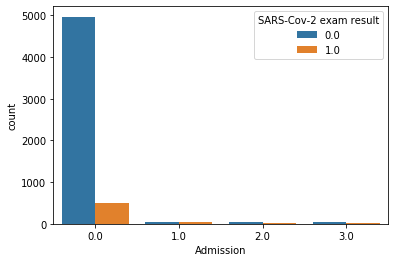

In [68]:
sns.countplot(df.Admission,hue=df['SARS-Cov-2 exam result'])
# Most of them are not admitted

In [69]:
# Let's Separate our dataset into Features and target
df_x=df.drop(columns=["Admission"])
y=df[["Admission"]]

In [70]:
df_x.drop('Patient ID',axis=1,inplace=True)

In [71]:
# Let's do Standard Scaling on the Continous variables (x)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,...,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,0.637244,-0.331229,4.764165e-18,-1.107006e-17,2.465901e-17,-3.918602e-17,4.253734e-17,-2.421858e-17,-5.953441e-18,-6.221900e-17,...,0.0,4.729248e-18,-4.213359e-20,-1.042818e-18,1.550393e-18,-6.318751e-18,3.581144e-19,-2.247052e-18,-4.378380e-19,-4.497790e-18
1,1.329598,-0.331229,7.235930e-01,-1.584282e+00,3.277265e-02,3.123296e-01,9.748137e-01,-2.911253e+00,-2.896903e-01,-6.851574e-01,...,0.0,4.729248e-18,-4.213359e-20,-1.042818e-18,1.550393e-18,-6.318751e-18,3.581144e-19,-2.247052e-18,-4.378380e-19,-4.497790e-18
2,-0.228198,-0.331229,4.764165e-18,-1.107006e-17,2.465901e-17,-3.918602e-17,4.253734e-17,-2.421858e-17,-5.953441e-18,-6.221900e-17,...,0.0,4.729248e-18,-4.213359e-20,-1.042818e-18,1.550393e-18,-6.318751e-18,3.581144e-19,-2.247052e-18,-4.378380e-19,-4.497790e-18
3,-0.747464,-0.331229,4.764165e-18,-1.107006e-17,2.465901e-17,-3.918602e-17,4.253734e-17,-2.421858e-17,-5.953441e-18,-6.221900e-17,...,0.0,4.729248e-18,-4.213359e-20,-1.042818e-18,1.550393e-18,-6.318751e-18,3.581144e-19,-2.247052e-18,-4.378380e-19,-4.497790e-18
4,0.983421,-0.331229,4.764165e-18,-1.107006e-17,2.465901e-17,-3.918602e-17,4.253734e-17,-2.421858e-17,-5.953441e-18,-6.221900e-17,...,0.0,4.729248e-18,-4.213359e-20,-1.042818e-18,1.550393e-18,-6.318751e-18,3.581144e-19,-2.247052e-18,-4.378380e-19,-4.497790e-18


In [72]:
# For Multi-Class Classification let's focus on 'accuracy' score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score,accuracy_score
from sklearn.model_selection import train_test_split
def acc(clf,df_x,y):
    max_acc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        acc_scr=accuracy_score(y_test,y_pred)
        if acc_scr>max_acc_score:
            max_acc_score=acc_scr
            final_r_state=r_state
    print("max acc score corresponding to ",final_r_state," is ",max_acc_score)
    return final_r_state

In [73]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring='accuracy')
    print("Mean acc score for classifier: ",c_scores.mean())
    print("standard deviation in acc score for classifier: ",c_scores.std())
    print(c_scores)

In [75]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x)

array([[-2.22293103e-01,  1.66088690e-01, -9.33162943e-02, ...,
        -6.58396455e-17, -1.68742550e-17, -9.79511727e-17],
       [ 4.30086603e-01,  7.37924867e-01, -4.46269469e+00, ...,
        -9.24049152e-17,  1.70791956e-17,  4.17721801e-17],
       [-2.40174710e-01,  1.33390061e-01, -2.54213600e-02, ...,
         2.66338732e-16, -1.69130565e-16, -3.32527590e-16],
       ...,
       [-2.54479996e-01,  1.07231157e-01,  2.88945874e-02, ...,
         5.20182691e-19, -1.03600434e-18,  8.29955294e-19],
       [ 9.38367917e+00, -5.46814746e+00,  3.15482464e-01, ...,
         1.37185163e-17, -1.32115098e-17, -1.25832652e-17],
       [-1.99554445e+00, -2.81616276e+00,  1.50115240e+00, ...,
         4.40860184e-17, -2.59698798e-17, -6.31398001e-17]])

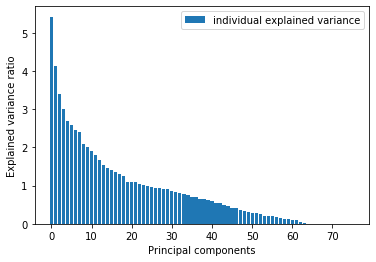

In [76]:
covariance=pca.get_covariance()
explained_variance=pca.explained_variance_
plt.bar(range(76),explained_variance, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend()

In [77]:
pca_modified=PCA(n_components=0.95)
x=pca_modified.fit_transform(x)
x.shape

(5644, 47)

In [78]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
r_state=acc(lg,x,y)

max acc score corresponding to  96  is  0.9849424269264836


In [79]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
parameters = {"n_estimators":[10,50,100,150,200,250,500]}
clf = GridSearchCV(rfc, parameters, cv=5,scoring="accuracy")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 150}

In [80]:
rfc=RandomForestClassifier(n_estimators=150)
r_state=acc(rfc,x,y)

max acc score corresponding to  96  is  0.978742249778565


In [81]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
parameters = {"criterion":["gini", "entropy"]}
clf = GridSearchCV(dc, parameters, cv=5,scoring="accuracy")
clf.fit(x, y)
clf.best_params_

{'criterion': 'gini'}

In [82]:
dc=DecisionTreeClassifier(criterion="gini")
r_state=acc(dc,x,y)

max acc score corresponding to  82  is  0.9769707705934455


In [83]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
r_state=acc(gnb,x,y)

max acc score corresponding to  50  is  0.9300265721877768


In [84]:
# Cross Validation

print("\n\nRandom Forest Classifier\n\n")
model_evaluation(rfc,x,y)

print("\n\nDecisionTree Classifier\n\n")
model_evaluation(dc,x,y)

print("\n\nLogistic Regression Classifier\n\n")
model_evaluation(lg,x,y)

print("\n\nGaussian NB Classifier\n\n")
model_evaluation(gnb,x,y)




Random Forest Classifier


Mean acc score for classifier:  0.967930730138389
standard deviation in acc score for classifier:  0.0012973168789694308
[0.96545616 0.96811337 0.96899911 0.96811337 0.96897163]


DecisionTree Classifier


Mean acc score for classifier:  0.9576537951742896
standard deviation in acc score for classifier:  0.00505720243474468
[0.9486271  0.9619132  0.9619132  0.96014172 0.95567376]


Logistic Regression Classifier


Mean acc score for classifier:  0.9675761202093109
standard deviation in acc score for classifier:  0.0035700272822894092
[0.96102746 0.96899911 0.96899911 0.97165633 0.96719858]


Gaussian NB Classifier


Mean acc score for classifier:  0.9122967039179842
standard deviation in acc score for classifier:  0.02351299195746807
[0.86625332 0.92914083 0.92559787 0.92559787 0.91489362]


In [85]:
# Selecting Random Forest Classifier

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 96,test_size=0.20)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

In [87]:
print("Confusion matrix \n",multilabel_confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Confusion matrix 
 [[[   3   20]
  [   1 1105]]

 [[1115    2]
  [  12    0]]

 [[1122    2]
  [   5    0]]

 [[1123    0]
  [   6    0]]]
classification report 
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1106
         1.0       0.00      0.00      0.00        12
         2.0       0.00      0.00      0.00         5
         3.0       0.00      0.00      0.00         6

    accuracy                           0.98      1129
   macro avg       0.25      0.25      0.25      1129
weighted avg       0.96      0.98      0.97      1129

Accuracy Score: 0.978742249778565


In [88]:
import joblib
joblib.dump(rfc,'Brazil_admissions_2.pkl')

['Brazil_admissions_2.pkl']